## Settings for Matroos database

The matroos database is the operational forecasting database of Rijkswaterstaat. Several times a day new forecasts are made with several hydrodynamic (tides and surge) models and wave models. 
The most important models in this context are:
- dd zuno-v4 - this is the current model for the southern North-Sea (available 21-april-2020 until now)
- harmonie - the weather model currently used at KNMI

In [13]:
# Settings for Matroos
# use:
# https://matroos.rws.nl if you have an account at that server or
# https://matroos.deltares.nl/ if you have a vpn connection to Deltares or are working in a Deltares office 
database_url = "https://matroos.rws.nl"
username = "svsd"
password = "n0v2006" #Do not save the password to a public location, such as at github
water_model = "dcsmv6_zunov4_zuno_kf_harmonie"


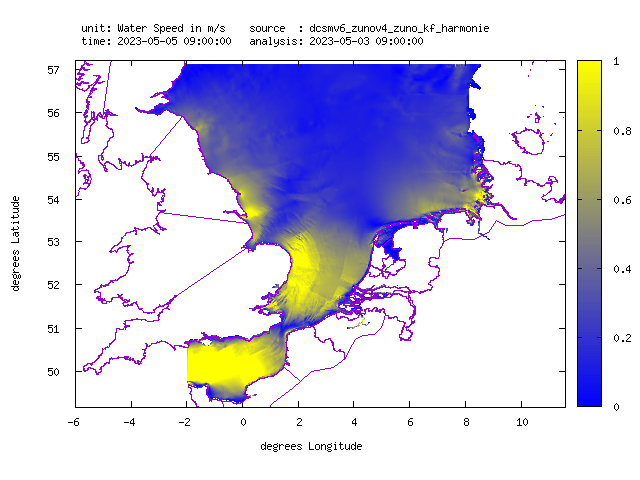

In [11]:
# show image of dd_zunov4 in this notebook
from IPython.display import Image
dd_zunov4_image=Image(filename='images/dd_zunov4.png')
dd_zunov4_image

In [19]:
# extenal modules
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [6]:
# Check the connection to the server
# If you get a data-time for today then everything is working
# There is no need to re-run this cell all the time, since it's just a check

# Download url with get parameters 
url="https://matroos.deltares.nl/direct/get_anal_times.php?database=maps2d&loc=&source=zeedelta_v1&unit=&tstart=&tstop=&timezone=&most_recent=5"

# send request to server
r = requests.get(url, auth=(username, password))
# download data into a pandas dataframe
df = pd.read_csv(r.url, sep=';', index_col=0, parse_dates=True, dayfirst=True)

df

""
202305030900


In [15]:
# Settings for collecting the data
#initial and final date and time in timezone UTCC (NL winter time is UTC+1, NL summer time is UTC+2)
tstart = "2022-10-01 00:00:00" # start of the period of interest (year-month-day hour:minute:second)
tstop  = "2022-10-02 00:00:00" # end of the period of interest
longitude_min = 4.0 # minimum longitude (most western point in degrees)
longitude_max = 6.0 # maximum longitude (most eastern point in degrees)
latitude_min = 53.0 # minimum latitude (most southern point in degrees)
latitude_max = 54.0 # maximum latitude (most northern point in degrees)
cellx = 100 # number of data points in x-direction (larger will give more detail, but also result in larger files)
celly = 100 # number of data points in y-direction ( you should start carefully with 100, and use an image to check if the data has sufficient detail; see image below)
# The data has the form of a cube with directions x, y and time. The size of the cube is (cellx,celly,ntime) and proportional in filesize to the prduct of these three numbers. For larger values the database will become slower and beyond a certain size it will not respond anymore.


# no need to change anything below this line
fieldoutput="VELU,VELV,VELUV_ABS,SEP" #download these variables (velocity and waterlevel)
stridetime=1 # collect all times or skip some (1 means all times, 2 means every second time, 3 means every third time, etc.)

In [18]:
# Download the data from the server

# TODO: url something like this: 
#export tstart=202206120000
#export  tstop=202206140000
#wget -O scheveningen_zeedelta_500m_${tstart}_${tstop}.nc "http://matroos.deltares.nl:80//direct/get_matroos.php?source=zeedelta_v1&#anal=000000000000&z=0&xmin=3.499730&xmax=5.502290&ymin=51.648030&ymax=52.468970&coords=WGS84&xmin_abs=3.49973&xmax_abs=5.50229&#ymin_abs=51.64803&ymax_abs=52.46897&color=VELU,VELV,VELUV_ABS,SEP&interpolate=size&now=${tstop}&to=${tstop}&from=${tstart}&#outputformat=nc&stridex=&stridey=&stridetime=1&xn=276&yn=178&celly=500&cellx=500&fieldoutput=VELU,VELV,VELUV_ABS,SEP&format=nc"

#reformat time from for example "2022-10-01 00:00:00" to "202210010000"
tstart_str = tstart.replace("-","").replace(" ","").replace(":","")
tstop_str = tstop.replace("-","").replace(" ","").replace(":","")

#compose url
url = database_url + "/direct/get_matroos.php?source=" + water_model + "&anal=000000000000&z=0&xmin=" + str(longitude_min) + "&xmax=" + str(longitude_max) + "&ymin=" + str(latitude_min) + "&ymax=" + str(latitude_max) + "&coords=WGS84&xmin_abs=" + str(longitude_min) + "&xmax_abs=" + str(longitude_max) + "&ymin_abs=" + str(latitude_min) + "&ymax_abs=" + str(latitude_max) + "&color=" + fieldoutput + "&interpolate=size&now=" + tstop + "&to=" + tstop_str + "&from=" + tstart_str + "&outputformat=nc&stridex=&stridey=&stridetime=" + str(stridetime) + "&xn=" + str(cellx) + "&yn=" + str(celly) + "&celly=" + str(celly) + "&cellx=" + str(cellx) + "&fieldoutput=" + fieldoutput + "&format=nc"
# send request to server
r = requests.get(url, auth=(username, password))
# save data to file
filename = "data/" + water_model + "_" + tstart_str + "_" + tstop_str + ".nc"
f = open(filename, "wb")
f.write(r.content)
f.close()
